In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tesla = pd.read_csv("Tesla.csv")
tesla.head()

,text,date,favs,retweet
0,@NateSilver538 Tesla makes cars with sophistic...,Thu Mar 19 04:16:37 +0000 2020,10478,1890
1,Tesla's Musk offers to make ventilators amid s...,Thu Mar 19 08:00:33 +0000 2020,1039,302
2,Elon Musk says Tesla is willing to make ventil...,Thu Mar 19 15:15:01 +0000 2020,1015,238
3,RT @SamanthaTheEA: @elonmusk there is not one ...,Thu Mar 19 19:52:25 +0000 2020,0,11
4,@Jennerator211 @Tesla You don’t have to now......,Thu Mar 19 19:52:24 +0000 2020,0,0


In [3]:
bitcoin = pd.read_csv("full bitcoin.csv")
bitcoin.head()

,text,date,favs,retweet
0,WHY IS DOLLAR DYING? 2008 Fed printed $4.5 Tr...,Tue Apr 07 12:14:18 +0000 2020,6867,2030
1,"The argument of ""the Bitcoin halving is priced...",Mon Apr 06 12:51:25 +0000 2020,1641,285
2,Billionaire and former Facebook exec makes the...,Mon Apr 06 14:27:38 +0000 2020,771,249
3,"RT @SamTheCarpetMan: @Breaking911 Good, perhap...",Wed Apr 08 00:32:16 +0000 2020,0,1
4,@LordoftheTrends @DrBitcoinMD What exactly in ...,Wed Apr 08 00:32:15 +0000 2020,0,0


In [4]:
bitcoin2 = pd.read_csv("full bitcoin 2.csv")
bitcoin2.head()

,text,date,favs,retweet
0,WHY IS DOLLAR DYING? 2008 Fed printed $4.5 Tr...,Tue Apr 07 12:14:18 +0000 2020,8179,2399
1,The same people who think bitcoin is 'dead' at...,Tue Apr 07 12:47:24 +0000 2020,2124,177
2,You can now watch my full interview with @theR...,Tue Apr 07 11:56:46 +0000 2020,409,87
3,RT @krakenfx: *NEW* KRAKEN RELEASES MARCH #BIT...,Wed Apr 08 17:00:41 +0000 2020,0,1
4,"RT @MeltedCrypto: 1,000 $XRP to 1 random #Foll...",Wed Apr 08 17:00:40 +0000 2020,0,22


In [5]:
bitcoin3 = pd.read_csv("full bitcoin 3.csv")
bitcoin3.head()

,text,date,favs,retweet
0,regarding the Valorant anticheat always runnin...,Fri Apr 17 16:35:15 +0000 2020,4784,346
1,There’s a fake interview going around on Faceb...,Sat Apr 18 09:46:37 +0000 2020,1484,108
2,Weekend Trap? Bitcoin Price Hits $7.3K in Atte...,Sat Apr 18 17:59:21 +0000 2020,0,0
3,RT @biconnections: 🚨Fast #Bitcoin #Crypto #Giv...,Sat Apr 18 17:59:20 +0000 2020,0,38
4,RT @Paolo62103142: You have your own #website ...,Sat Apr 18 17:59:20 +0000 2020,0,1


# VADER Sentiment Analysis

In [6]:
df = bitcoin.append(bitcoin2, ignore_index = True)
df.drop_duplicates(subset = "text", inplace = True)

df = df.append(bitcoin3, ignore_index = True)
df.drop_duplicates(subset = "text", inplace = True)

len(df)

3575

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

# Defining function to extract polarity scores
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score["compound"]
    

ModuleNotFoundError: No module named 'vaderSentiment'

In [11]:
df["vader"] = df["text"].apply(sentiment_analyzer_scores)
df.head(10)

,text,date,favs,retweet,vader
0,WHY IS DOLLAR DYING? 2008 Fed printed $4.5 Tr...,Tue Apr 07 12:14:18 +0000 2020,6867,2030,0.8434
1,"The argument of ""the Bitcoin halving is priced...",Mon Apr 06 12:51:25 +0000 2020,1641,285,-0.4588
2,Billionaire and former Facebook exec makes the...,Mon Apr 06 14:27:38 +0000 2020,771,249,0.0000
3,"RT @SamTheCarpetMan: @Breaking911 Good, perhap...",Wed Apr 08 00:32:16 +0000 2020,0,1,0.8162
4,@LordoftheTrends @DrBitcoinMD What exactly in ...,Wed Apr 08 00:32:15 +0000 2020,0,0,0.0000
5,RT @EtherSmart_ORG: #Ethersmart keep growing s...,Wed Apr 08 00:32:12 +0000 2020,0,125,0.8713
6,RT @BTC_Prometheus: #Giveaway $60 BTC\n\nOne p...,Wed Apr 08 00:32:11 +0000 2020,0,693,0.6908
7,RT @BitSler: Hello Guys! How are you! 😎\n\n10 ...,Wed Apr 08 00:32:09 +0000 2020,0,41,0.7716
8,RT @Dehkunle: What’s stopping you from investi...,Wed Apr 08 00:32:02 +0000 2020,0,104,-0.1531
9,RT @YourCryptoJedi: Use Lolli 🍭to earn bitcoin...,Wed Apr 08 00:32:00 +0000 2020,0,1,0.6588


In [11]:
df = pd.read_csv(".csv")

,id,user,fullname,url,timestamp,replies,likes,retweets,text,vader
0,1.078873e+18,TheBitfi,Bitfi - open source: bitfi.dev,NaN,2018-12-29,9.0,61.0,16.0,The first lab made diamond happened in amp no...,0.7678
1,9.862542e+17,keno_sanders,Keno Sanders,NaN,2018-04-17,1.0,7.0,1.0,Great talk and discussions about Bitcoin vs Eu...,0.7650
2,9.616666e+17,CryptoGamer_,CryptoGamer,NaN,2018-02-08,23.0,135.0,51.0,When things are down remember its never as bad...,0.0387
3,9.354113e+17,real_vijay,Vijay Boyapati,NaN,2017-11-28,12.0,509.0,238.0,While there are no a priori rules about the p...,0.4588
4,1.005368e+18,Ok_coinexchange,OK.NET,NaN,2018-06-09,39.0,324.0,160.0,Wow We reached K followers just within weeks ...,0.9217
5,8.250705e+17,Annrhefn,Annrhefn,NaN,2017-01-27,19.0,267.0,155.0,Central Banking created Debt Serfdom This is a...,-0.1280
6,9.644832e+17,MScDigital,Digital Currency,NaN,2018-02-16,90.0,1598.0,502.0,Professional Certifications that will help jum...,0.4019
7,9.083219e+17,pierre_rochard,Pierre Rochard [??????],NaN,2017-09-14,19.0,1248.0,434.0,I would not be interested in Bitcoin if govern...,0.1139
8,1.026876e+18,ShaniNiazi786,Zeeshan Asmat Khan,NaN,2018-08-07,85.0,95.0,87.0,I will choose Random Followers to Win FOLLOW...,0.7925
9,1.078984e+18,Plasma_Pay,PlasmaPay,NaN,2018-12-29,2.0,100.0,132.0,Remiit a blockchainpowered remittance platform...,0.0000


# BERT Sentiment Analysis with Sentiment140

In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
% matplotlib inline

Using TensorFlow backend.


### Creating Dataframe

In [8]:
cols = ['sentiment','id','date','query_string','user','text']
train = pd.read_csv("training.1600000.processed.noemoticon.csv", 
                    header=None, names=cols,
                   encoding = "latin1")
train = train[["sentiment", "text"]]
train["len"] = [len(x) for x in train["text"]]
train.head()

,sentiment,text,len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [9]:
train["sentiment"].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

### Preprocessing

In [11]:
#Removing URL
train["text"] = [re.sub("http.{0,8}[A-Za-z0-9./]+", '', x) for x in train["text"]]

#Removing @ tags
train["text"] = [re.sub(r'@[A-Za-z0-9]+','', x) for x in train["text"]]

#Removing HTML encoding
train["text"] = [re.sub(r'&[A-Za-z0-9]+','', x) for x in train["text"]]

#Removing Byte Order Mark
train["text"] = [re.sub(r'ï¿½', '?', x) for x in train["text"]]

#Removing Hashtags
train["text"] = [re.sub(r"#", ' ', x) for x in train["text"]]

#Removing Numbers
train["text"] = [re.sub(r"[0-9]", ' ', x) for x in train["text"]]

#Removing anything that's not a letter
train["text"] = [re.sub(r"[^a-zA-Z]", ' ', x) for x in train["text"]]

### BERT

In [12]:
device = torch.device("cuda")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P40'

In [ ]:
# Tokenization
sentences = ["[CLS] " + query + " [SEP]" for query in train["text"]]
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

In [ ]:
MAX_LEN = max([len(x) for x in tokenized_texts]) 
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")


In [10]:
import pickle

In [ ]:
input_ids = pickle.load(open("input_ids.pkl", "rb"))

In [14]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)    

In [15]:
labels = train["sentiment"].apply(lambda x: 1 if x == 4 else 0)

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=42, test_size=0.2)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs).long()
validation_inputs = torch.tensor(validation_inputs).long()
train_labels = torch.tensor(train_labels.values).long()
validation_labels = torch.tensor(validation_labels.values).long()
train_masks = torch.tensor(train_masks).long()
validation_masks = torch.tensor(validation_masks).long()

# Select a batch size for training. 
batch_size = 32

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [16]:
import torch.nn as nn

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [17]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

loss = nn.CrossEntropyLoss()

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
validation_loss_set = []

train_accuracy_set = []
validation_accuracy_set = []

# Number of training epochs 
epochs = 3

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
    ## TRAINING

    # Set our model to training mode
    model.train()  
    
    # Tracking variables
    train_loss, train_accuracy = 0, 0
    nb_train_steps, nb_train_examples = 0, 0
    
    # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)        
        lossout = loss(output, b_labels)   
        # Backward pass
        lossout.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        logits = output.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        nb_train_steps += 1
        
        tr_loss += lossout.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
    train_loss_set.append(tr_loss/nb_tr_steps)
    train_accuracy_set.append(train_accuracy/nb_train_steps)
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    print("Train Accuracy: {}".format(train_accuracy/nb_train_steps))

       
    ## VALIDATION

    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_ev_steps, nb_eval_examples = 0, 0, 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
            logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
            lossout_val = loss(logits, b_labels)
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
        
        # Loss
        eval_loss += lossout_val.item()
        nb_eval_examples += b_input_ids.size(0)
        nb_ev_steps += 1
    validation_loss_set.append(eval_loss/nb_ev_steps)
    validation_accuracy_set.append(eval_accuracy/nb_eval_steps)        
    print("Validation loss: {}".format(eval_loss/nb_ev_steps))    
    print("Validation Accuracy: {} \n\n".format(eval_accuracy/nb_eval_steps))

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.35164096132386474
Train Accuracy: 0.84473046875


Epoch:  33%|███▎      | 1/3 [4:25:40<8:51:20, 15940.12s/it]

Validation loss: 0.32798154949098823
Validation Accuracy: 0.859209375 


Train loss: 0.2966812129945494
Train Accuracy: 0.8731515625


Epoch:  67%|██████▋   | 2/3 [8:51:23<4:25:41, 15941.17s/it]

Validation loss: 0.3314019749626517
Validation Accuracy: 0.8602875 


Train loss: 0.2506233406974003
Train Accuracy: 0.8955125


Epoch: 100%|██████████| 3/3 [13:17:18<00:00, 15946.24s/it] 

Validation loss: 0.356741145048663
Validation Accuracy: 0.85685 




In [18]:
torch.save(model.state_dict(), "bert_state")

# Running trained BERT on Tweets

In [8]:
df = pd.read_csv("final bitcoin.csv")

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.load_state_dict(torch.load("bert_state"))
device = torch.device("cuda")
model = model.to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [10]:
text = df["text"]

# Tokenization
sentences = ["[CLS] " + query + " [SEP]" for query in text]
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['[CLS]', 'the', 'first', 'lab', 'made', 'diamond', 'happened', 'in', 'amp', 'now', 'they', 'are', 'so', 'flawless', 'that', 'mined', 'diamonds', 'can', '##t', 'come', 'close', 'the', 'same', 'will', 'happen', 'to', 'gold', 'not', 'to', 'mention', 'the', 'massive', 'supply', 'available', 'on', 'asteroids', 'amp', 'other', 'sources', 'as', 'a', 'result', 'bit', '##co', '##in', 'is', 'a', 'necessary', 'part', 'of', 'human', 'evolution', '[SEP]']


In [11]:
MAX_LEN = max([len(x) for x in tokenized_texts]) 
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [14]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)    

In [15]:
inputs = torch.tensor(input_ids).long().to(device)
masks = torch.tensor(attention_masks).long().to(device)

In [16]:
import time 
start = time.time()

logits = []
for x in range(inputs.shape[0]):
    with torch.no_grad():
        logits.append(model(inputs[x].unsqueeze(0), token_type_ids=None, attention_mask=masks[0].unsqueeze(0))) 
    
print(time.time() - start)

12565.857963562012


In [17]:
import pickle 

with open("logits.pkl", 'wb') as save_file:
    pickle.dump(logits, save_file, -1)

/home/ky848/.local/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [18]:
logits = [x.cpu() for x in logits]
final = [np.argmax(x[0]).item() for x in logits]

In [23]:
with open("sentiment140_sentiments.pkl", 'wb') as save_file:
    pickle.dump(final, save_file, -1)

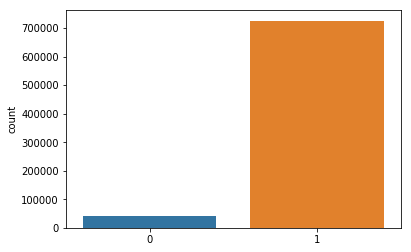

In [22]:
import seaborn as sns

sns.countplot(final)